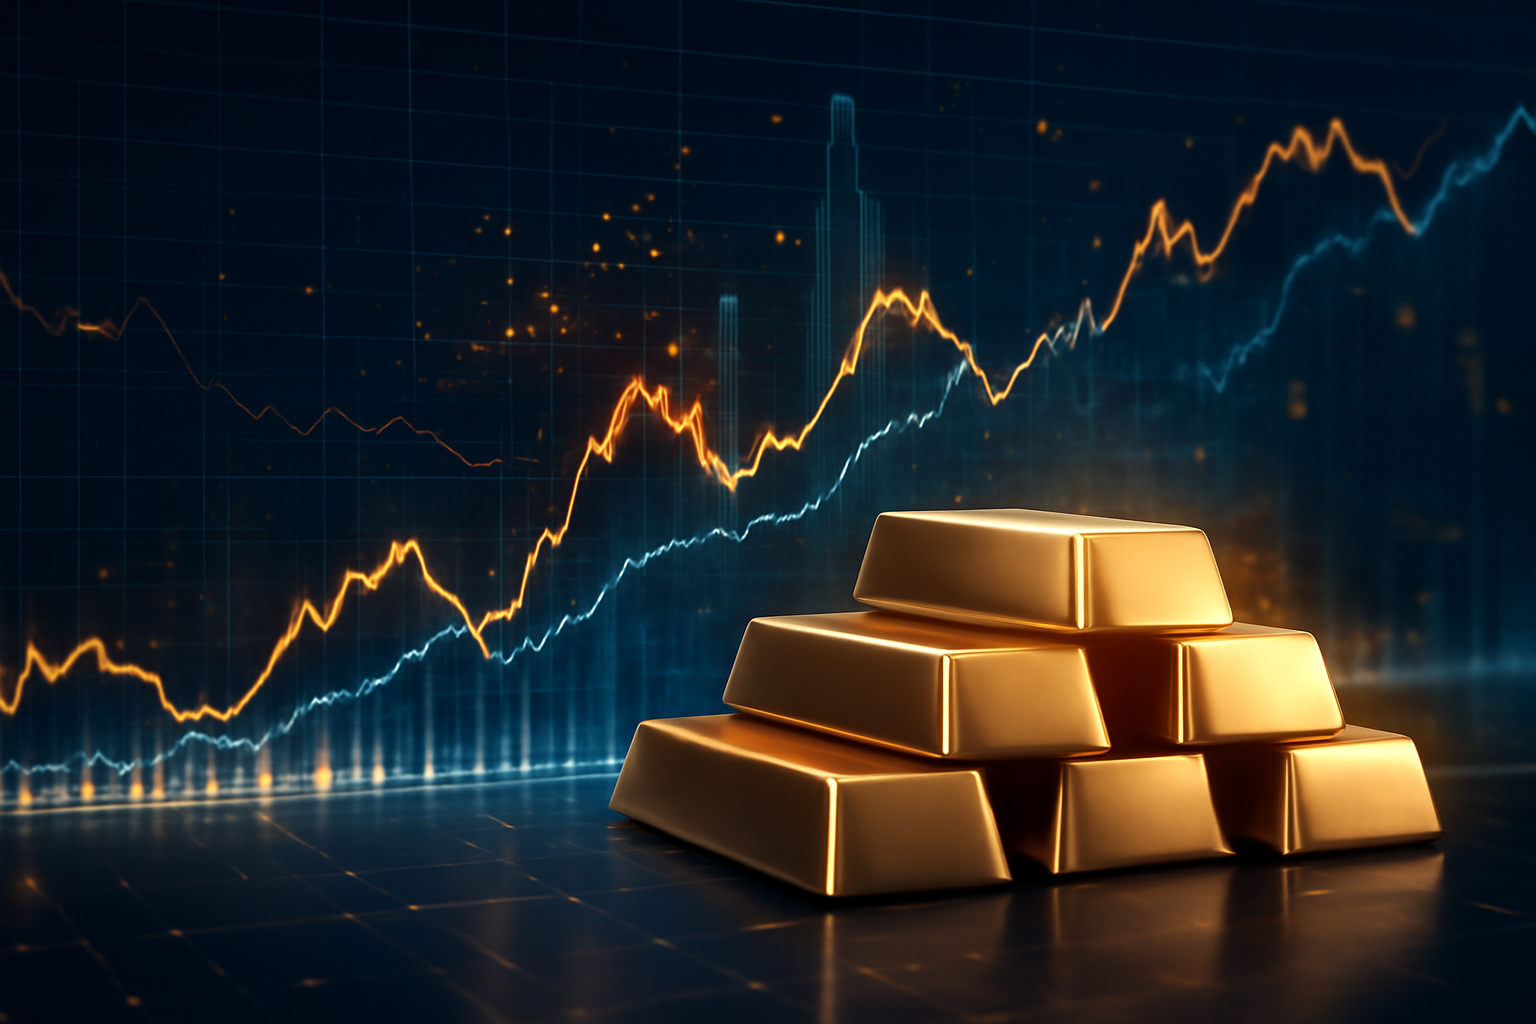
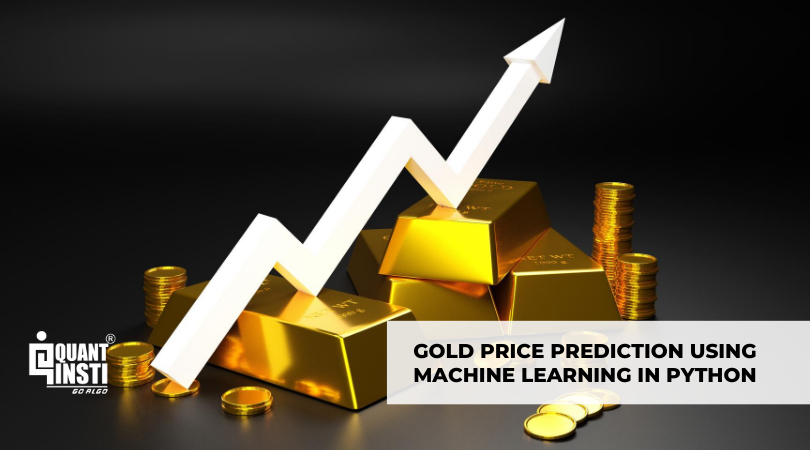

# 💾 About Data

<table style="width:80%;margin:auto;border-collapse:separate;border-spacing:0;font-family:'Segoe UI',Tahoma,sans-serif;border:1px solid #ddd;border-radius:10px;overflow:hidden;box-shadow:0 2px 8px rgba(0,0,0,0.05);color:#000;">
  <thead>
    <tr style="background-color:#f7c59f;color:#000;">
      <th style="padding:14px;font-size:17px;text-align:left;border-bottom:2px solid #ddd;">Variable Name</th>
      <th style="padding:14px;font-size:17px;text-align:left;border-bottom:2px solid #ddd;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color:#fff;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Date</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Date in <b>MM/dd/yyyy</b> format.</td>
    </tr>
    <tr style="background-color:#fdf6f0;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">SPX</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">The Standard and Poor's 500 index (S&amp;P 500), a stock market index tracking 500 major US companies.</td>
    </tr>
    <tr style="background-color:#fff;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">GLD</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Gold price.</td>
    </tr>
    <tr style="background-color:#fdf6f0;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">USO</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">United States Oil Fund ® LP (USO), an exchange-traded security traded on the NYSE Arca.</td>
    </tr>
    <tr style="background-color:#fff;">
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">SLV</td>
      <td style="padding:12px;font-size:16px;border-bottom:1px solid #eee;">Silver price.</td>
    </tr>
    <tr style="background-color:#fdf6f0;">
      <td style="padding:12px;font-size:16px;">EUR/USD</td>
      <td style="padding:12px;font-size:16px;">Euro to US dollar exchange ratio.</td>
    </tr>
  </tbody>
</table>

# 📚 Importing Libraries

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
from rich import print
print("[green]Importing Libraries Successfully...[green]")

Importing Libraries Successfully...

# 🛠️ Data PreProcessing

## 📂 Load the data

In [211]:
df = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')
print("[green]Data loaded Successfully...[green]")


Data loaded Successfully...

In [212]:
df = df.drop(columns=['Date'],axis=1)

## 📊 Display random columns

In [213]:
df.sample(10)

SPX    GLD    USO    SLV  EUR/USD
2089 2453.46 118.43   9.12 15.61   1.11  
2038 2344.02 118.54  10.11 16.61   1.07  
121  1277.00  93.06 103.32 17.76   1.57  
1142 1556.22 152.99  33.04 28.02   1.30  
207   890.64  85.90  30.20 10.82   1.41  
1788 1853.44 113.83   8.64 14.59   1.11  
1790 1851.86 114.46   7.96 14.55   1.13  
1699 1938.76 108.22  14.44 14.12   1.12  
612  1184.38 131.92  35.81 24.07   1.40  
1074 1409.93 166.55  31.79 32.62   1.29

## 🔢 Number of rows and columns

In [214]:
print("the number of rows:",df.shape[0])
print("the number of columns:",df.shape[1])

the number of rows: 2290

the number of columns: 5

## 🔍 Some statistical measures

In [215]:
df.describe().T.round(2).style.background_gradient(cmap="Greens")


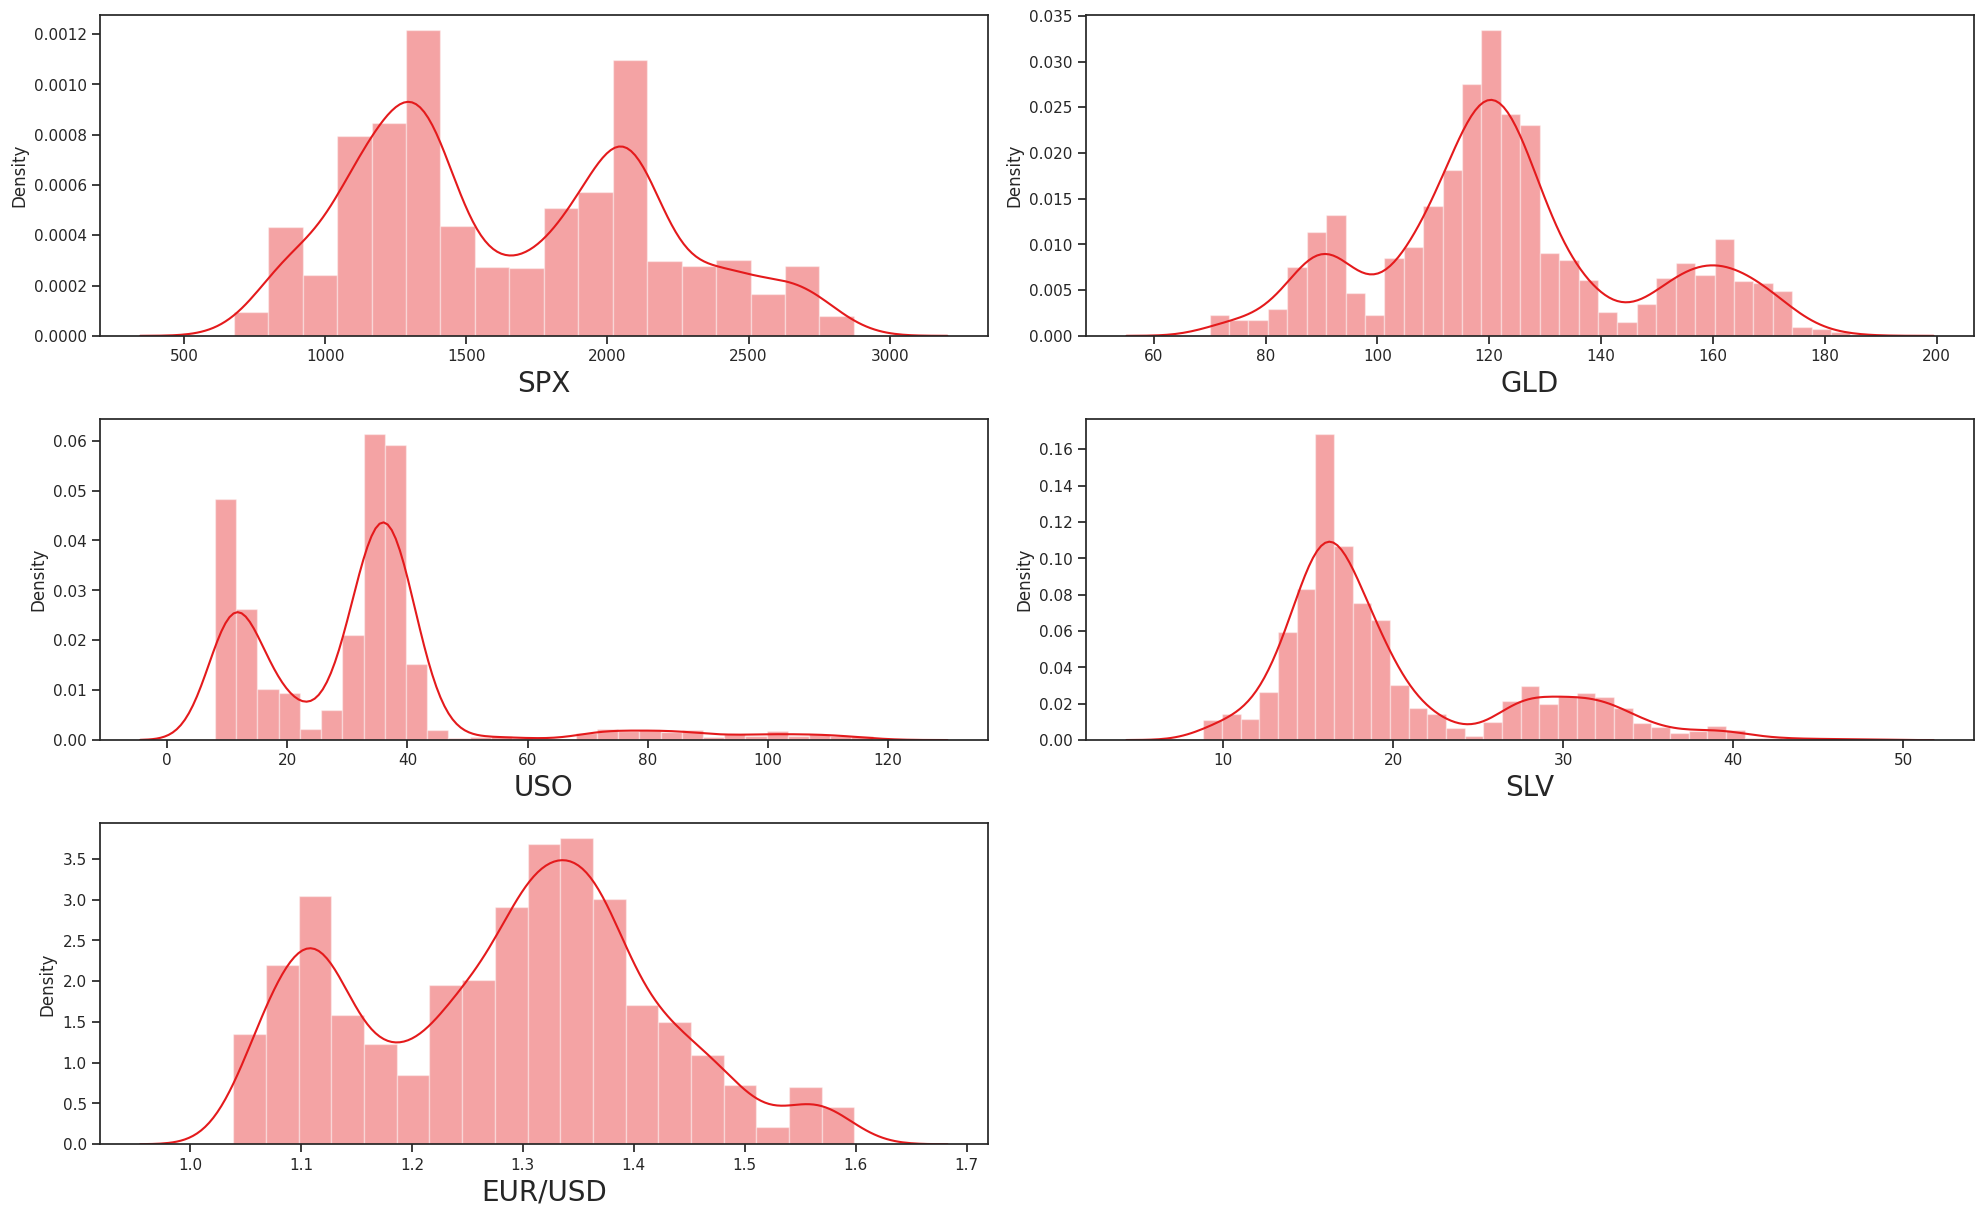

In [216]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(10,2,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
    plotnum += 1
plt.tight_layout()
plt.show()

<Axes: >

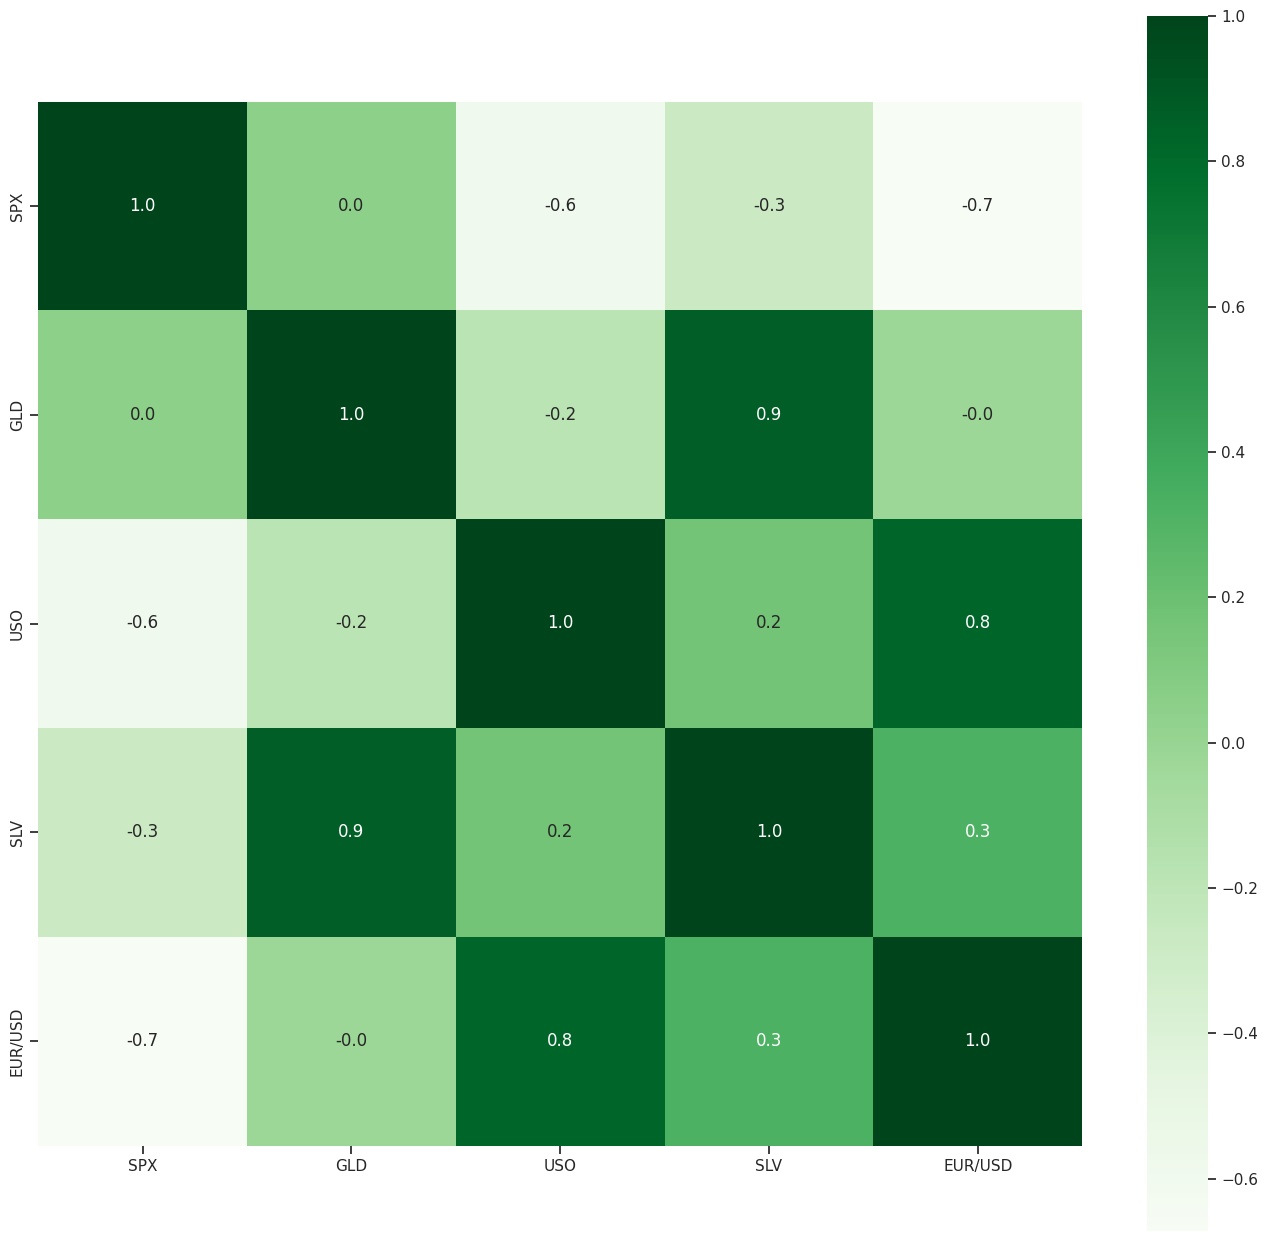

In [217]:
corr=df[num_col].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':12},cmap='Greens')

In [218]:
print(df[num_col].skew())


SPX        0.30
GLD        0.33
USO        1.70
SLV        1.15
EUR/USD   -0.01
dtype: float64

In [219]:
print(df[num_col].kurt())


SPX       -0.95
GLD       -0.28
USO        4.23
SLV        0.47
EUR/USD   -0.74
dtype: float64

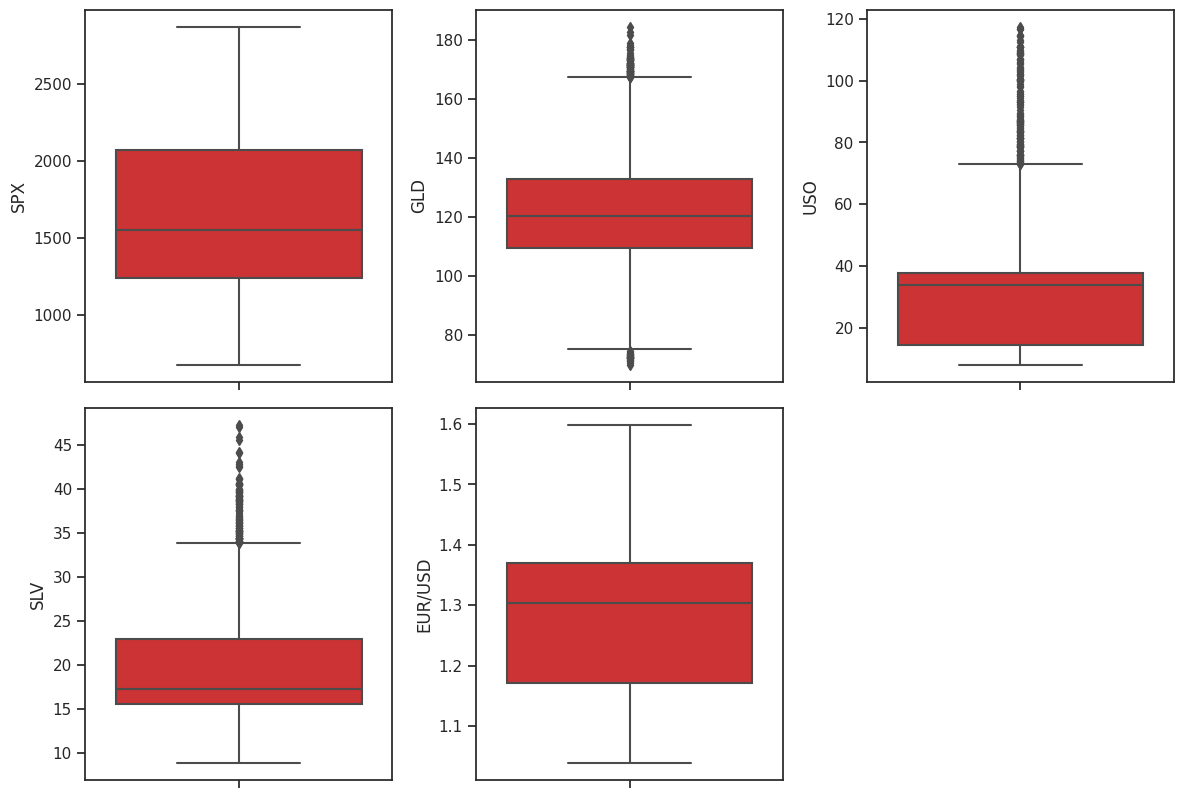

In [220]:
plt.figure(figsize=(12,20))
plotnum = 1
for columns in df[num_col]:
    if plotnum <= len(df[num_col].columns) :
        ax=plt.subplot(5,3,plotnum)
        sns.boxplot(y=df[columns])

    plotnum += 1
plt.tight_layout()
plt.show()

## 📄 information about Dataset

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


## 🧹 Null & NAN & Duplicated

In [222]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of Null in DataFrame is:  0

The Number of NAN in DataFrame is:  0

The Number of duplicated in DataFrame is:  0

## ⚡ Auto Visualization

In [223]:
!pip install autoviz


Shape of your Data Set loaded: (2290, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Date']
To fix these data quality issues in the dataset, import FixDQ

Number of All Scatter Plots = 15


<Figure size 1000x500 with 0 Axes>

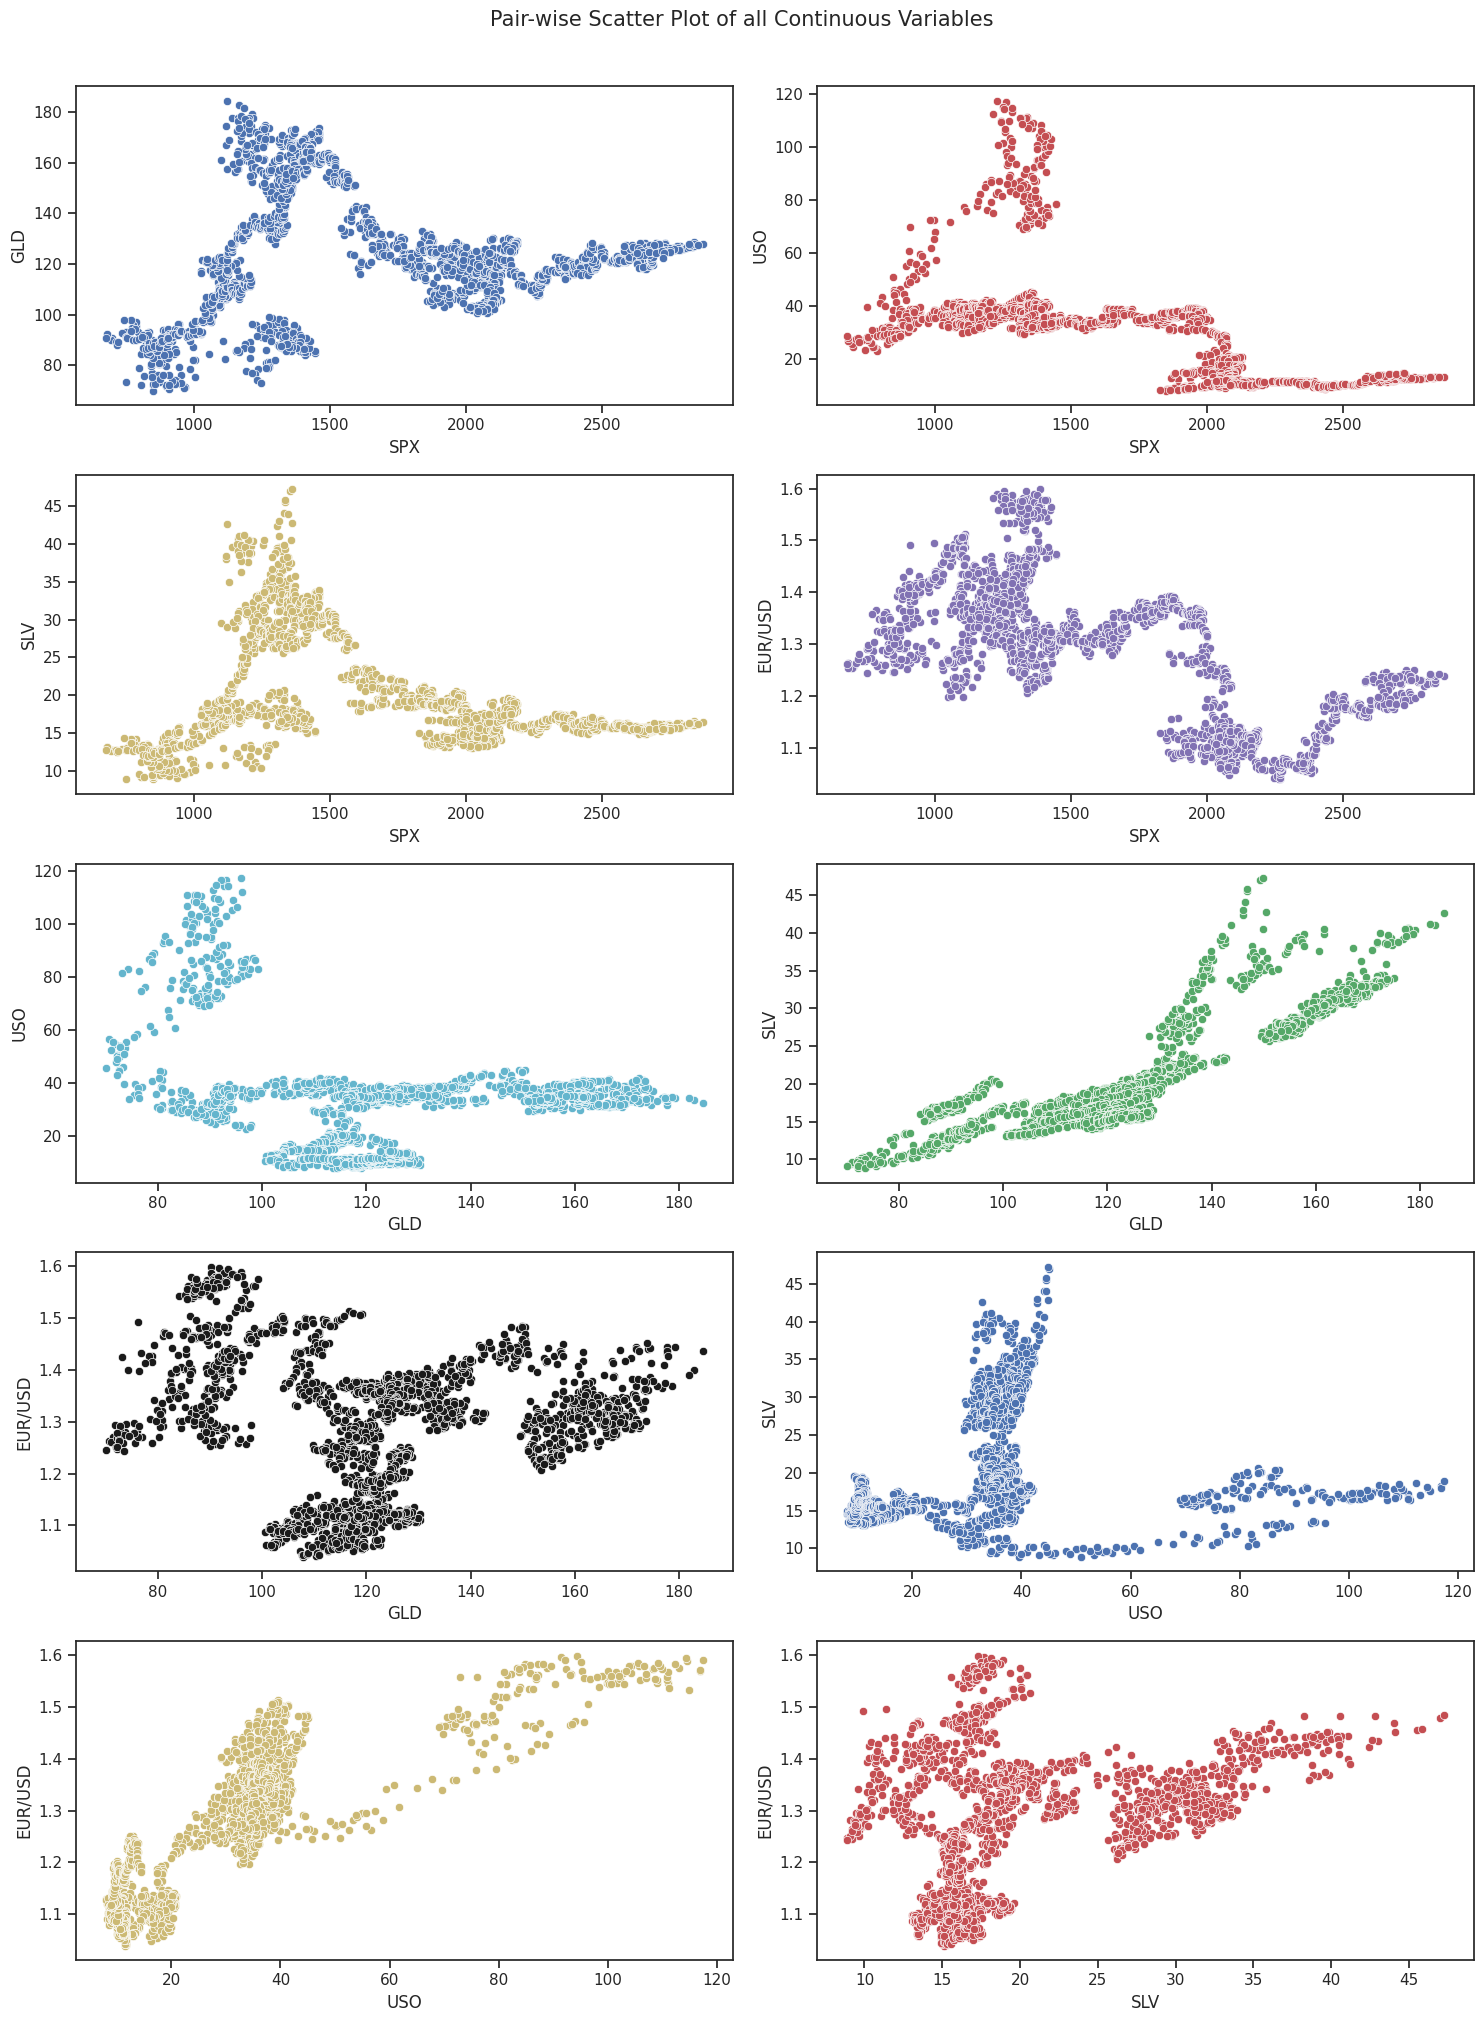

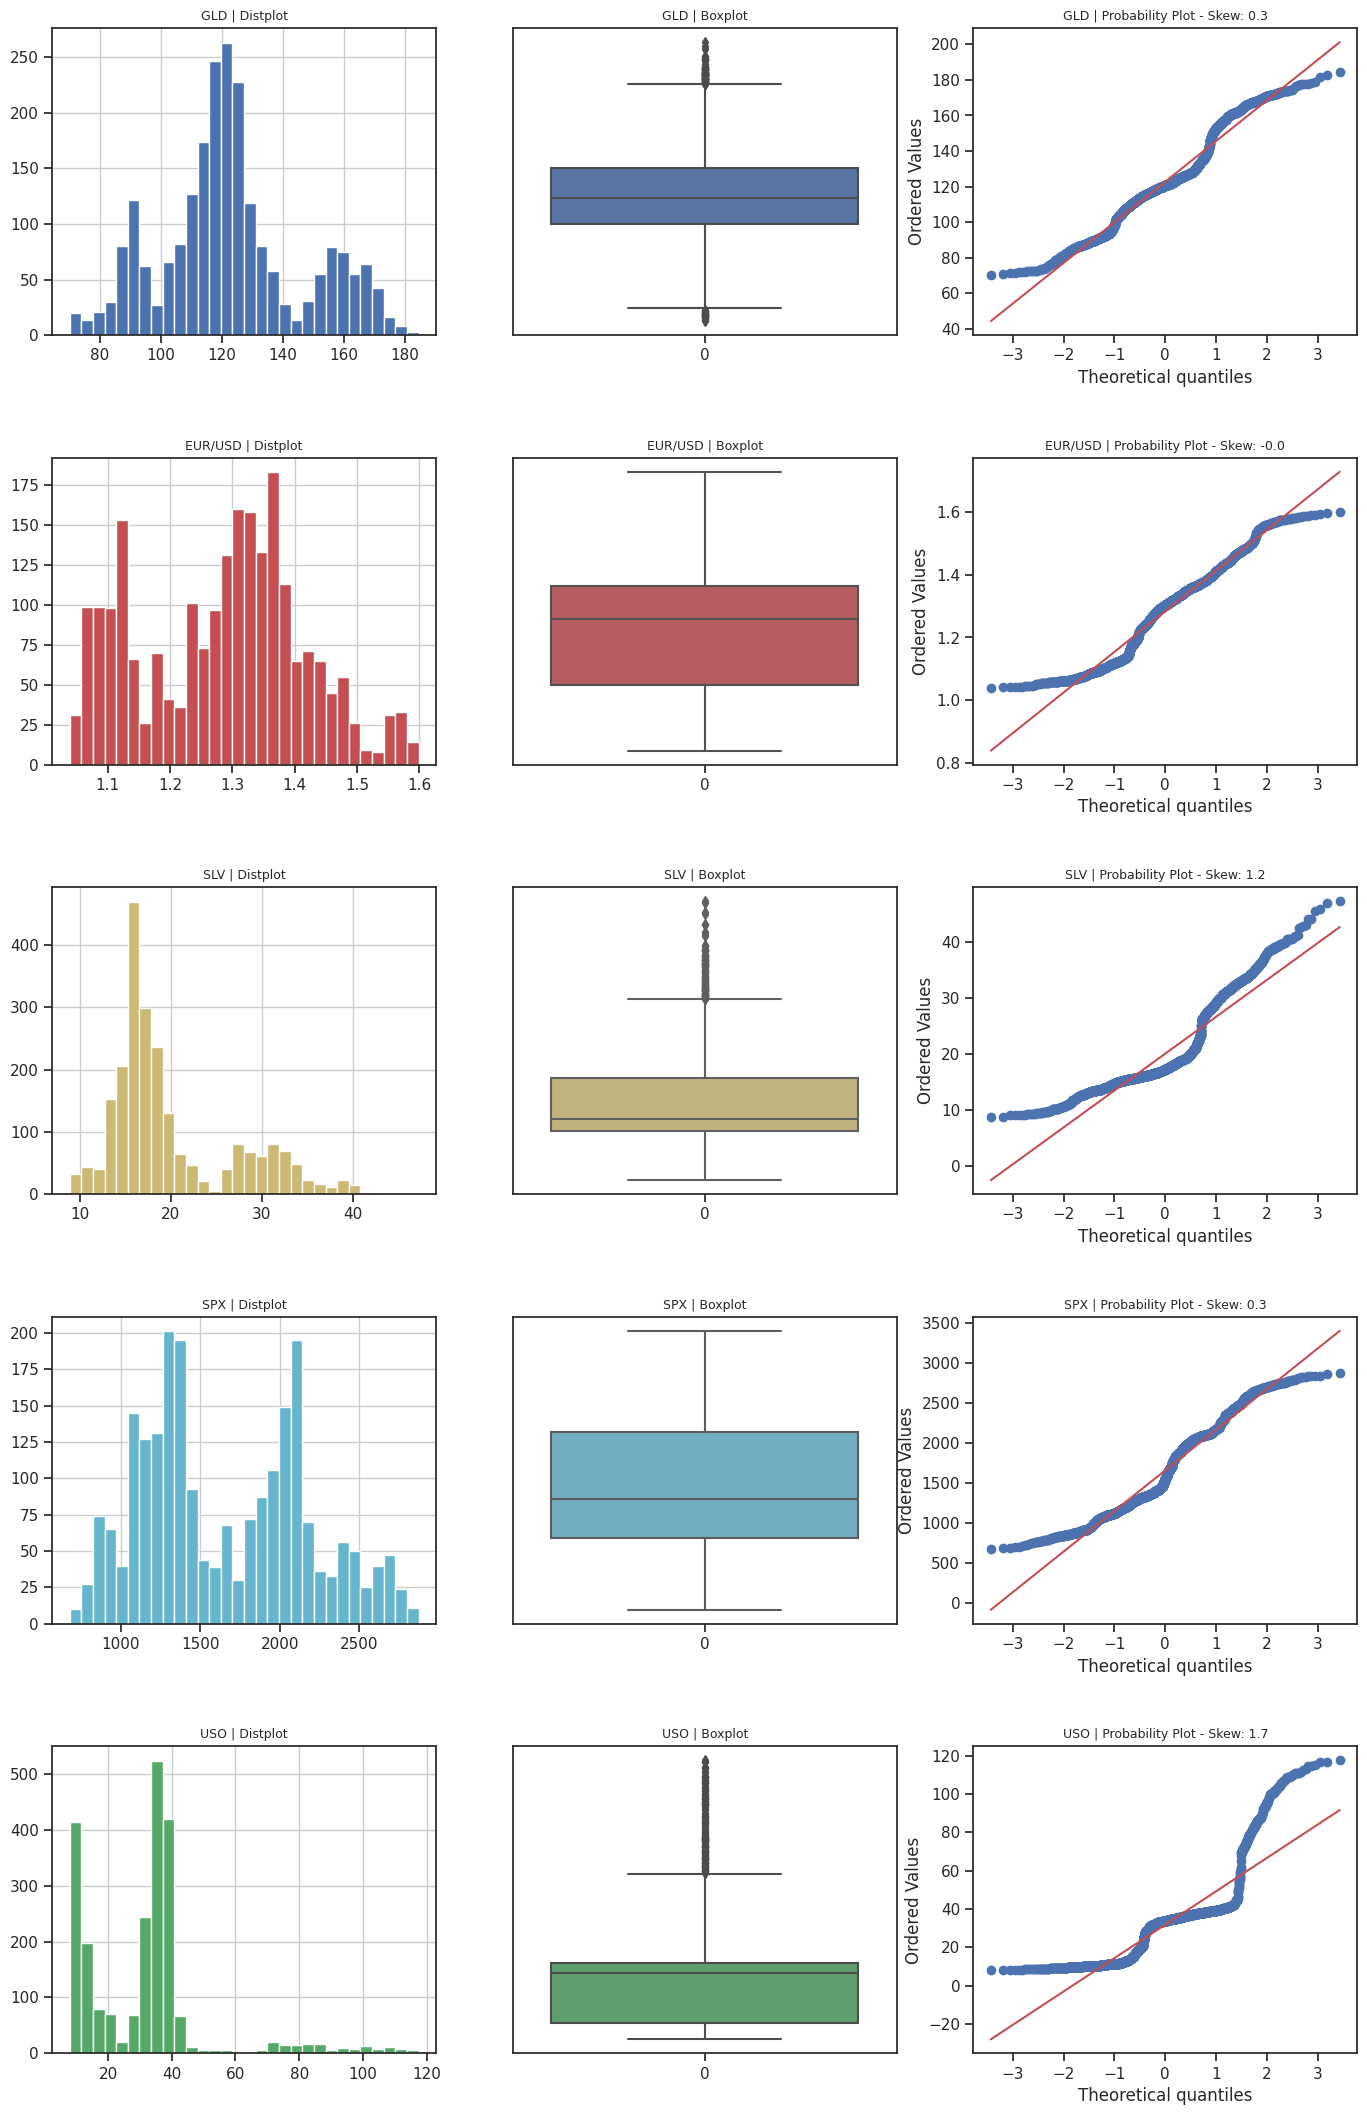

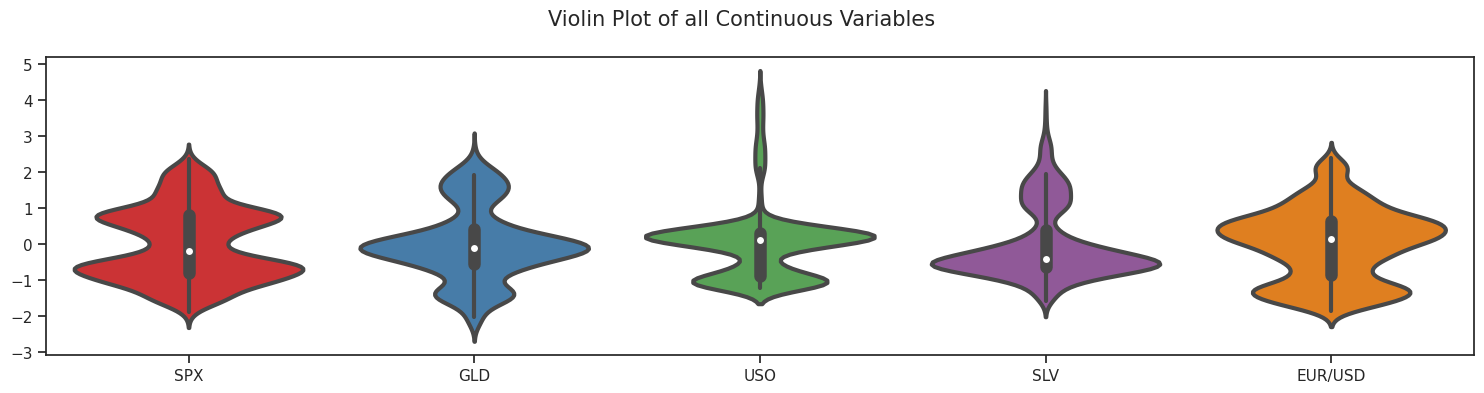

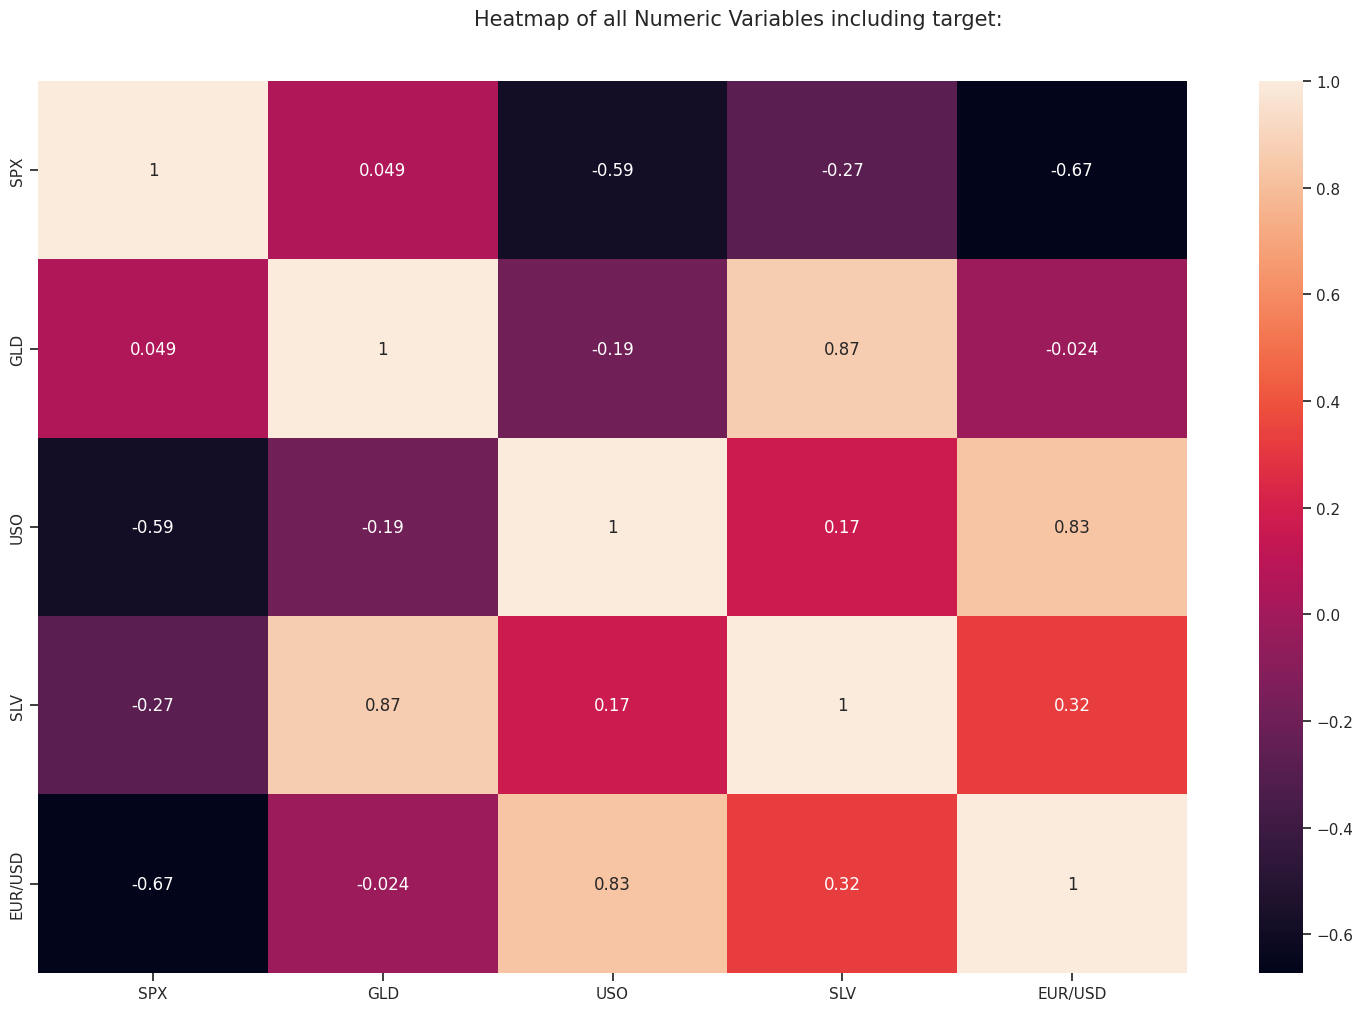

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [224]:
plt.figure(figsize = (10, 5))
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('/kaggle/input/gold-price-data/gld_price_data.csv')
plt.show()

# ⚙️ Prepare Data for models

## 🔄⚖️Handeling outliers

In [225]:
for i in df.columns:
    df[i] = np.log1p(df[i])

print("[green]Data handeled Successfully...[green]")

Data handeled Successfully...

## 📐 Standarized Data

In [226]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled, columns=df.columns, index=df.index)

print("[green]Data standerized Successfully...[green]")

Data standerized Successfully...

## ✂️ Separating the data

In [227]:
X = df_scaled.drop(['GLD','SLV','USO'],axis=1)
y = df_scaled['GLD']

In [228]:
!pip install lazypredict

## 🔀 Splitting the data into train, test, and validate

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [230]:
print("X shape:", X.shape)
print("y shape:", y.shape)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_validate shape:", X_val.shape)

print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)
print("Y_validate shape:", y_val.shape)

X shape:
(2290, 2)

y shape:
(2290,)

X_train shape:
(1603, 2)

X_test shape:
(344, 2)

X_validate shape:
(343, 2)

Y_train shape:
(1603,)

Y_test shape:
(344,)

Y_validate shape:
(343,)

# 🤖 Train Model

## 🪄Auto Modeling

In [231]:
from lazypredict.Supervised import LazyRegressor

model = LazyRegressor()
models = model.fit(X_train,X_test,y_train,y_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1603, number of used features: 2
[LightGBM] [Info] Start training from score 0.002145


(
                                   Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                 0.90           0.91     0.31     0.39   
KNeighborsRegressor                   0.90           0.90     0.32     0.01   
ExtraTreesRegressor                   0.90           0.90     0.32     0.24   
LGBMRegressor                         0.89           0.89     0.33     0.07   
HistGradientBoostingRegressor         0.88           0.88     0.35     0.32   
BaggingRegressor                      0.87           0.88     0.36     0.05   
GaussianProcessRegressor              0.86           0.86     0.38     0.22   
GradientBoostingRegressor             0.86           0.86     0.38     0.19   
SVR                                   0.82           0.82     0.44     0.11   
NuSVR                                 0.82           0.82     0.44     0.13   
DecisionTreeRegressor                 0.80           0.80     0.45     0.02   
MLPRegressor                          0.78           0.79     0.47     1.21   
ExtraTreeRegressor                    0.76           0.76     0.50     0.01   
AdaBoostRegressor                     0.70           0.70     0.56     0.04   
KernelRidge                           0.07           0.07     0.98     0.11   
LarsCV                                0.07           0.07     0.98     0.02   
LassoLarsCV                           0.07           0.07     0.98     0.01   
LassoLarsIC                           0.07           0.07     0.98     0.01   
Lars                                  0.07           0.07     0.98     0.01   
OrthogonalMatchingPursuitCV           0.07           0.07     0.98     0.01   
TransformedTargetRegressor            0.07           0.07     0.98     0.01   
LinearRegression                      0.07           0.07     0.98     0.01   
Ridge                                 0.07           0.07     0.98     0.01   
RidgeCV                               0.07           0.07     0.98     0.01   
LassoCV                               0.07           0.07     0.98     0.07   
BayesianRidge                         0.07           0.07     0.98     0.01   
ElasticNetCV                          0.07           0.07     0.98     0.05   
SGDRegressor                          0.07           0.07     0.98     0.01   
OrthogonalMatchingPursuit             0.06           0.06     0.99     0.01   
HuberRegressor                        0.05           0.06     0.99     0.05   
LinearSVR                             0.04           0.05     1.00     0.01   
TweedieRegressor                      0.03           0.04     1.00     0.01   
RANSACRegressor                       0.01           0.02     1.01     0.04   
DummyRegressor                       -0.01          -0.00     1.02     0.01   
ElasticNet                           -0.01          -0.00     1.02     0.01   
Lasso                                -0.01          -0.00     1.02     0.01   
LassoLars                            -0.01          -0.00     1.02     0.01   
PassiveAggressiveRegressor           -0.38          -0.37     1.19     0.01   ,
                                   Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                 0.90           0.91     0.31     0.39   
KNeighborsRegressor                   0.90           0.90     0.32     0.01   
ExtraTreesRegressor                   0.90           0.90     0.32     0.24   
LGBMRegressor                         0.89           0.89     0.33     0.07   
HistGradientBoostingRegressor         0.88           0.88     0.35     0.32   
BaggingRegressor                      0.87           0.88     0.36     0.05   
GaussianProcessRegressor              0.86           0.86     0.38     0.22   
GradientBoostingRegressor             0.86           0.86     0.38     0.19   
SVR                                   0

## 🔧Manual Modeling

In [232]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [233]:
CV = []
R2_train = []
R2_val = []
R2_test = []
results = [] 

def gold_pred_model(model, model_name):
    model.fit(X_train, y_train)
    
    # Train
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))
    
    # Validation
    y_pred_val = model.predict(X_val)
    R2_val_model = r2_score(y_val, y_pred_val)
    R2_val.append(round(R2_val_model, 2))
    
    # Test
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model, 2))
    
    # Cross-validation
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    # Save results
    results.append({
        "Model": model_name,
        "Train R2": round(R2_train_model, 2),
        "Validation R2": round(R2_val_model, 2),
        "Test R2": round(R2_test_model, 2),
        "CV Mean": round(cv_mean, 2)
    })
    
    print(f"Model: {model_name}")
    print("Train R2-score :", round(R2_train_model, 2))
    print("Validation R2-score :", round(R2_val_model, 2))
    print("Test R2-score :", round(R2_test_model, 2))
    print("Train CV scores :", cross_val)
    print("Train CV mean :", round(cv_mean, 2))
    
    # -------- Residual & Scatter plots --------
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    ax[0].set_title('Residual Plot (Train)')
    sns.histplot((y_train - y_pred_train), kde=True, ax=ax[0], color='blue')
    ax[0].set_xlabel('y_train - y_pred_train')
    
    ax[1].set_title('Residual Plot (Validation)')
    sns.histplot((y_val - y_pred_val), kde=True, ax=ax[1], color='green')
    ax[1].set_xlabel('y_val - y_pred_val')
    
    ax[2].set_title('y_test vs y_pred_test')
    ax[2].scatter(y_test, y_pred_test, color='blue', edgecolor='green', alpha=0.6)
    ax[2].set_xlabel('y_test')
    ax[2].set_ylabel('y_pred_test')
    
    plt.tight_layout()
    plt.show()
    
    # -------- Line chart: Actual vs Predicted --------
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, color='red', label='Actual Price')
    plt.plot(y_pred_test, color='green', label='Predicted Price')
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Index')
    plt.ylabel('Gold Price')
    plt.legend()
    plt.show()


In [234]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor



Model: Extra Trees Regressor

Train R2-score : 1.0

Validation R2-score : 0.84

Test R2-score : 0.91

Train CV scores : [0.75210441 0.71258128 0.75301543 0.76906473 0.80845341]

Train CV mean : 0.76

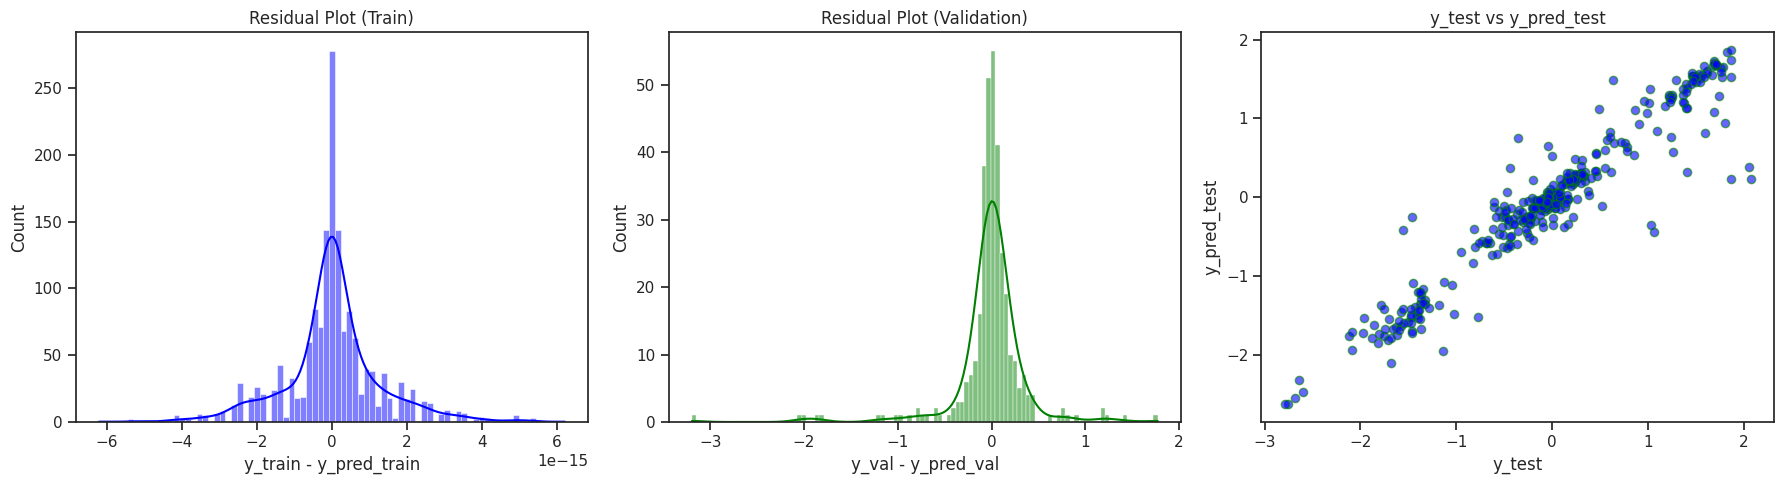

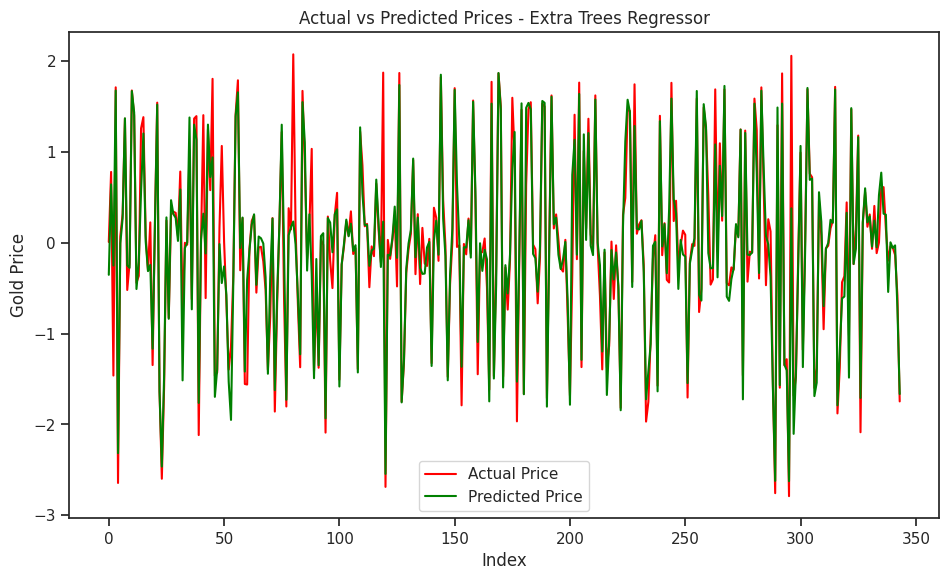

In [235]:
etr = ExtraTreesRegressor()
gold_pred_model(etr, "Extra Trees Regressor")

Model: Bagging Regressor

Train R2-score : 0.96

Validation R2-score : 0.83

Test R2-score : 0.9

Train CV scores : [0.78335268 0.69224868 0.75202803 0.69510356 0.81348657]

Train CV mean : 0.75

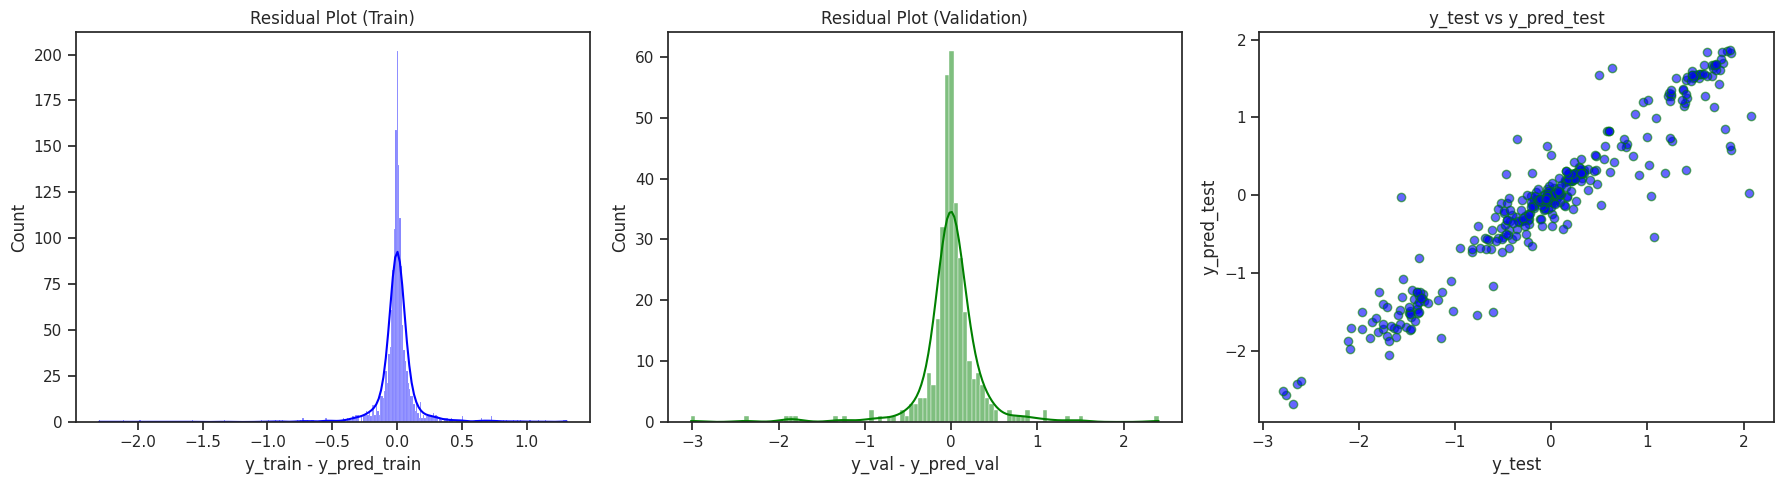

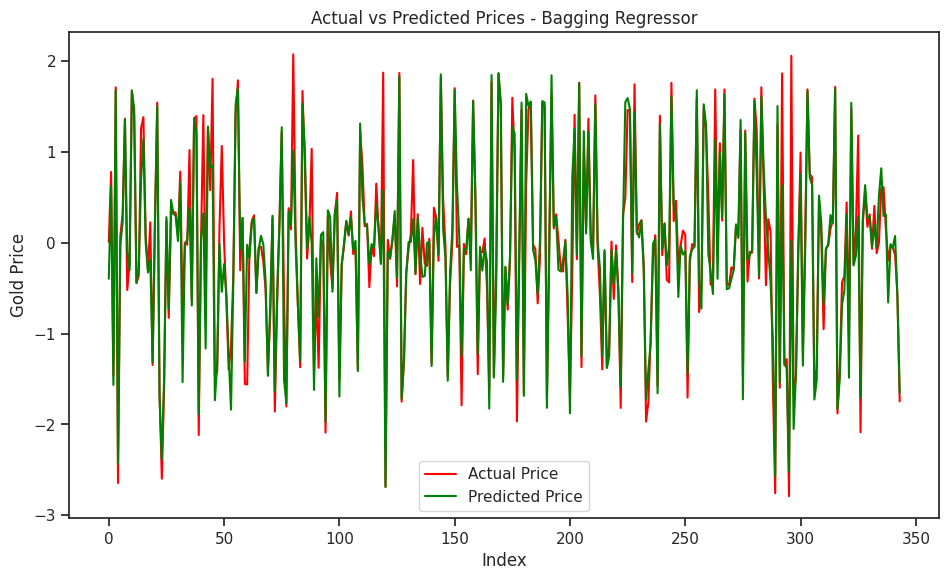

In [236]:
bg =BaggingRegressor()
gold_pred_model(bg, "Bagging Regressor")

Model: Random Forest Regressor

Train R2-score : 0.97

Validation R2-score : 0.84

Test R2-score : 0.91

Train CV scores : [0.77676534 0.70739156 0.7489531  0.77646815 0.83408576]

Train CV mean : 0.77

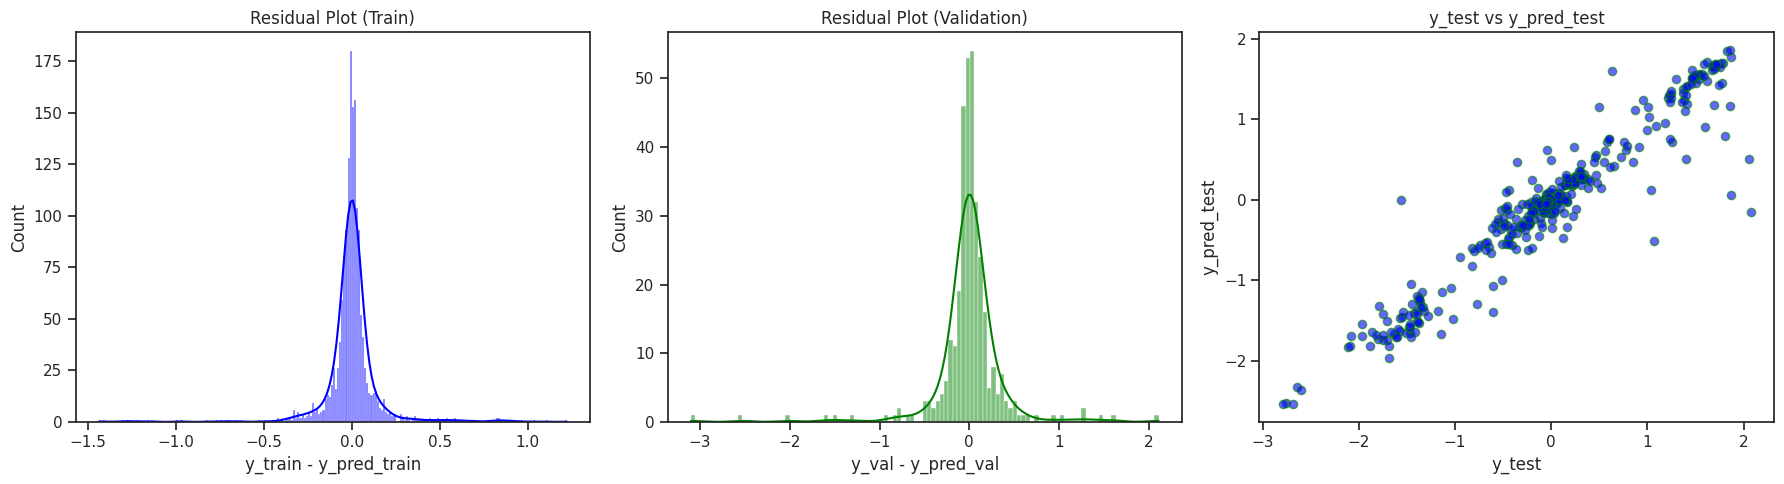

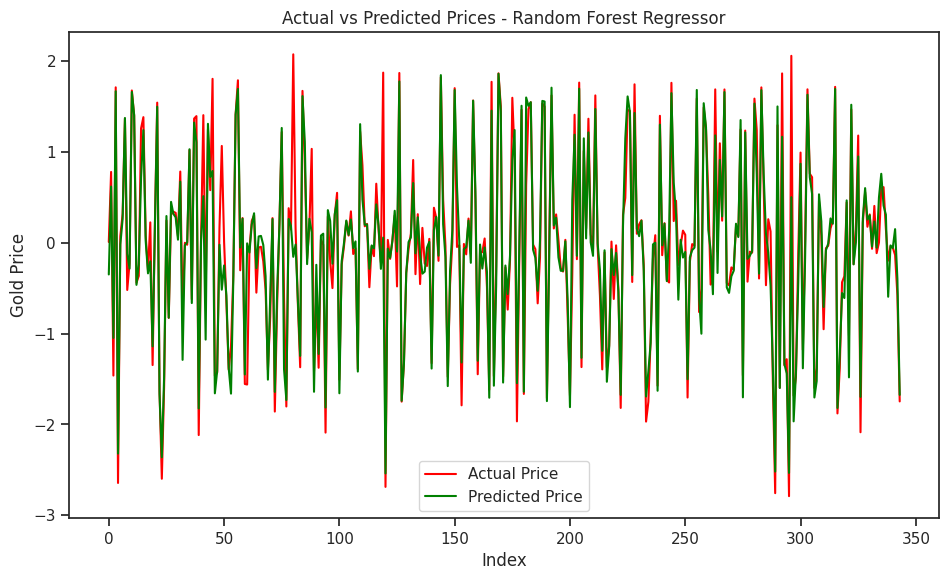

In [237]:
rfg=RandomForestRegressor()
gold_pred_model(rfg, "Random Forest Regressor")

In [238]:
results_df = pd.DataFrame(results)

display(results_df.sort_values(by="Test R2", ascending = False).style.background_gradient(cmap="Greens"))

# 🎉 Thank You

# Made by : Ali Osama ✍️

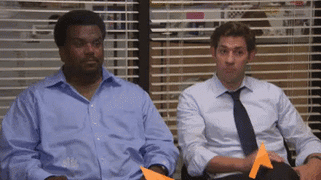